# **Import libraries, Read the data**

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving hotel_data_final.csv to hotel_data_final.csv


In [3]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['hotel_data_final.csv']))

In [4]:
# Print Multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()
df.info()

(23394, 12)

pandas.core.frame.DataFrame

280728

(23394, 12)

,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1.0,2.0,Rs.8989,"Hotels and Motels,Lodging,Meeting & Event Plan...",15400
1,1,The Point,Po Box 1327,Saranac Lake,Great family time,motomomMaryland,The point is possibly one of our favorite rest...,5.0,NaN,NaN,"Hotels,Restaurants",15740
2,1,The Point,Po Box 1327,Saranac Lake,Throw back to the Gatsby Era - don't miss The ...,ellen00007,From the minute you arrive until the minute yo...,5.0,NaN,NaN,"Hotels,Restaurants",13760
3,1,The Point,Po Box 1327,Saranac Lake,The Point of it all,Szerzek,That is the name on one of their boats. And th...,5.0,NaN,NaN,"Hotels,Restaurants",11027
4,1,The Point,Po Box 1327,Saranac Lake,The most amazing week end!,Sarahbnyc83,I was lucky enough to spend 2 nights at The Po...,5.0,NaN,NaN,"Hotels,Restaurants",10306


,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
23389,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,IN SEVERE NEED OF UPDATE - OVERHAUL,fordpipefitter,We spent 2 weeks in this hotel due to the cost...,2.0,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",13911
23390,3129,Quality Inn,2120 Jameson Pl S W,Decatur,NaN,RABBITS,VERY FRIENDLY AND GREAT PRICE. I HAVE STAYED A...,5.0,2.0,Rs.7373,"Hotels and Motels,Lodging",9306
23391,3129,Quality Inn,2120 Jameson Pl S W,Decatur,NaN,Contributor,Editorial Review by Citysearch Editors Colonia...,5.0,2.0,Rs.7373,"Hotels and Motels,Lodging",2888
23392,3130,Quality Inn,12439 Northwest Fwy,Houston,NaN,Houstontraveler,What Happened to this Place!!!! I come this ho...,NaN,2.0,Rs.7373,"Hotel & Motel Reservations,Hotels and Motels",4949
23393,3130,Quality Inn,12439 Northwest Fwy,Houston,NaN,Robyn Galbos,Budget-minded travelers appreciate amenities l...,NaN,2.0,Rs.7373,"Hotel & Motel Reservations,Hotels and Motels",9807


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        23394 non-null  int64  
 1   Hotel           23394 non-null  object 
 2   Address         23394 non-null  object 
 3   City            23394 non-null  object 
 4   Title           23342 non-null  object 
 5   Users           23394 non-null  object 
 6   Reviews         23393 non-null  object 
 7   Rating          23365 non-null  float64
 8   Hotel_Type      22432 non-null  float64
 9   Price           21881 non-null  object 
 10  Hotel_Category  23394 non-null  object 
 11  User_id         23394 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.1+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        23394 non-null  int64  
 1   Hotel           23394 non-null  object 
 2   Address         23394 non-null  object 
 3   City            23394 non-null  object 
 4   Title           23342 non-null  object 
 5   Users           23394 non-null  object 
 6   Reviews         23393 non-null  object 
 7   Rating          23365 non-null  float64
 8   Hotel_Type      22432 non-null  float64
 9   Price           21881 non-null  object 
 10  Hotel_Category  23394 non-null  object 
 11  User_id         23394 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.1+ MB


In [7]:
# Checking for the missing value
df.isnull().any()
df.isnull().sum()


Hotel_id          False
Hotel             False
Address           False
City              False
Title              True
Users             False
Reviews            True
Rating             True
Hotel_Type         True
Price              True
Hotel_Category    False
User_id           False
dtype: bool

Hotel_id             0
Hotel                0
Address              0
City                 0
Title               52
Users                0
Reviews              1
Rating              29
Hotel_Type         962
Price             1513
Hotel_Category       0
User_id              0
dtype: int64

In [8]:
# Dropping the missing values and checking the shape of the Dataset
df = df.dropna()
df = df.reset_index(drop=True)
print('Shape of dataset ',df.shape)
print(df.columns)

Shape of dataset  (21770, 12)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users', 'Reviews',
       'Rating', 'Hotel_Type', 'Price', 'Hotel_Category', 'User_id'],
      dtype='object')


In [9]:
# ReChecking for missing value
df.isnull().sum()

Hotel_id          0
Hotel             0
Address           0
City              0
Title             0
Users             0
Reviews           0
Rating            0
Hotel_Type        0
Price             0
Hotel_Category    0
User_id           0
dtype: int64

# **Exploratory Data Analysis**

In [10]:
counts1=df['User_id'].value_counts() 
counts2=df['Hotel_id'].value_counts()

In [11]:
counts1

710      218
17580    119
17618     73
5834      51
712       51
        ... 
13068      1
2827       1
4872       1
17154      1
0          1
Name: User_id, Length: 16502, dtype: int64

In [12]:
counts2

3113    269
9       260
38      211
2189    199
656     195
       ... 
1351      1
1383      1
1415      1
1527      1
0         1
Name: Hotel_id, Length: 2422, dtype: int64

In [13]:
# Unique Hotels and Users
print("Total data ")
print("-"*50)
print("\nTotal no of Ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.User_id)))
print("Total No of Hotels  :", len(np.unique(df.Hotel_id)))

Total data 
--------------------------------------------------

Total no of Ratings : 21770
Total No of Users   : 16502
Total No of Hotels  : 2422


In [14]:
df['Hotel'].unique()


array(['La Quinta', 'Inn At Queen Anne', 'Economy Inn', ...,
       'Sheraton Mission Valley San Diego Hotel',
       'Holiday Inn Canyon De Chelly', 'Polynesian Plaza'], dtype=object)

In [15]:
# Maximum and Minimum Rating
max_rating = df.Rating.max()
min_rating = df.Rating.min()
min_rating, max_rating

(1.0, 5.0)

In [16]:
df.Rating.value_counts()

5.0    10125
4.0     6244
3.0     2880
2.0     1299
1.0     1222
Name: Rating, dtype: int64

In [17]:
print("Mean rating : {}".format(df['Rating'].mean()))
print("Mean rating standard deviation: {}".format(df['Rating'].std()))

Mean rating : 4.045062011943041
Mean rating standard deviation: 1.157272811585155


(array([ 72.,  15.,  67.,  66.,  49., 216., 182., 456., 379., 692.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'mean rating given by each reviewer')

Text(0, 0.5, 'number of reviewers')

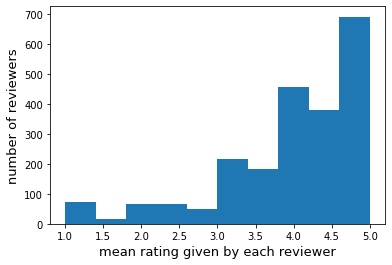

In [18]:
mean_rating_of_user = df.groupby('Hotel').apply(lambda x: x['Rating'].mean())

fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each reviewer', fontsize=13)
ax.set_ylabel('number of reviewers', fontsize=13)

In [19]:
ratings = pd.DataFrame(df.groupby('Hotel')['Rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('Hotel')['Rating'].count())
ratings.head()

,Rating,num of ratings
Hotel,,
11th Avenue Hotel Hostel,1.0,1
1906 Lodge At Coronado Beach,5.0,1
21c Museum Hotel Lexington,2.5,2
250 Main Hotel,5.0,2
402 Hotel #Thebigo,4.0,1


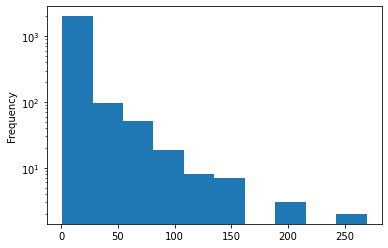

In [20]:
ratings['num of ratings'].plot(logy=True, kind='hist')
plt.show()

<Figure size 720x288 with 0 Axes>

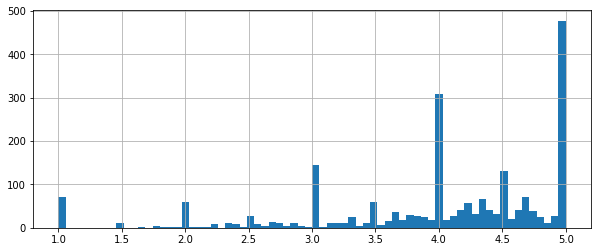

In [21]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=70)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c79f8e550>]],
      dtype=object)

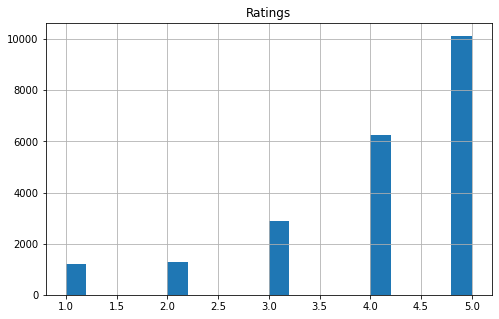

In [22]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Ratings":df["Rating"]})
scores.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c79f26320>]],
      dtype=object)

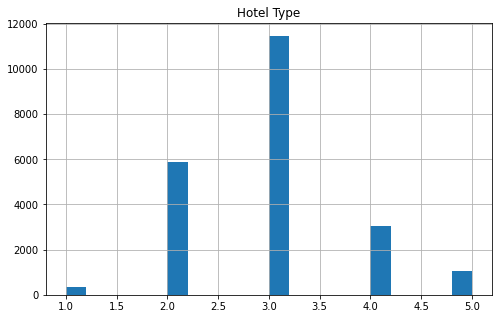

In [23]:
plt.rcParams['figure.figsize'] = (8, 5.0)
scores = pd.DataFrame({"Hotel Type":df["Hotel_Type"]})
scores.hist(bins=20)

In [24]:
#Hotel Name
hotel_name = df['Hotel'].value_counts()
hotel_name[:20]

Best Western Plus Waterville Grand Hotel              269
Doubletree By Hilton West Palm Beach Airport          260
Doubletree By Hilton Hotel Bay City - Riverfront      211
Metro Points Hotel-Washington North                   199
Hyatt House Seattle/Downtown                          195
Best Western Springfield                              156
The Westin Las Vegas Hotel & Spa                      156
Best Western Seven Seas                               146
French Market Inn                                     144
Hotel Emma                                            143
ARIA Resort Casino                                    139
St. James Hotel, an Ascend Hotel Collection Member    136
Grand Hyatt Seattle                                   134
Drury Inn & Suites New Orleans                        131
Luana Waikiki Hotel & Suites                          131
Galleria Park Hotel                                   124
Homewood Suites by Hilton Lake Buena Vista-Orlando    122
Hotel Diva    

In [25]:
info = pd.pivot_table(df,index=['Hotel'],values=['Rating'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

,sum,mean
,Rating,Rating
Hotel,,
Doubletree By Hilton West Palm Beach Airport,1082,4.161538
Best Western Plus Waterville Grand Hotel,982,3.650558
Doubletree By Hilton Hotel Bay City - Riverfront,943,4.469194
Hyatt House Seattle/Downtown,847,4.343590
Metro Points Hotel-Washington North,737,3.703518
Hotel Emma,696,4.867133
French Market Inn,642,4.458333
ARIA Resort Casino,626,4.503597


**Average rating for the 'Best Western Lamplighter Inn Suites at SDSU' is:**


In [26]:
df[df.Hotel_id==318].Rating.mean()# Average rating for 'Best Western Lamplighter Inn Suites at SDSU'


4.25

**Average rating for 'Nob Hill Hotel' is:**

In [27]:
df[df.Hotel_id==296].Rating.mean() #Average rating for 'Nob Hill Hotel'


3.1333333333333333

**The Hotels with the max number of ratings are:**

1.Best Western Plus Waterville Grand Hotel

2.Doubletree By Hilton West Palm Beach Airport

3.Doubletree By Hilton Hotel Bay City - Riverfront

In [28]:
MaxRating=df['Hotel_id'].value_counts().head(10)


In [29]:
MaxRating

3113    269
9       260
38      211
2189    199
656     195
2968    156
2741    156
1300    146
2822    144
2126    143
Name: Hotel_id, dtype: int64

**Hotels Rated only Once**

In [30]:
MinRating=df['Hotel_id'].value_counts()
MinRating=MinRating[MinRating==1]
print('Number of hotels which are rated once:',df.loc[MinRating.index,'Hotel'].shape)

Number of hotels which are rated once: (750,)


**Average rating of the people with highest number of rating**

In [31]:
ID=df.User_id.value_counts().head(10) #UserID wih highest number of rating
List5=[]
for i in ID.index:
    List5.append(df[df.User_id==i]['Rating'].mean())

List5

[3.5275229357798166,
 3.6134453781512605,
 3.4657534246575343,
 3.764705882352941,
 3.9215686274509802,
 3.8,
 3.8958333333333335,
 3.9565217391304346,
 3.869565217391304,
 3.5555555555555554]

**Frequent Name - User Name**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'User_Name_Count')

Text(0.5, 0, 'User_Name')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

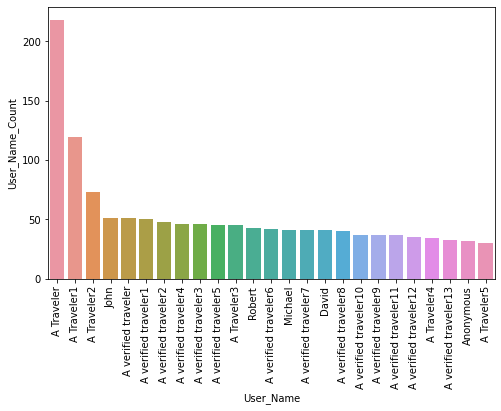

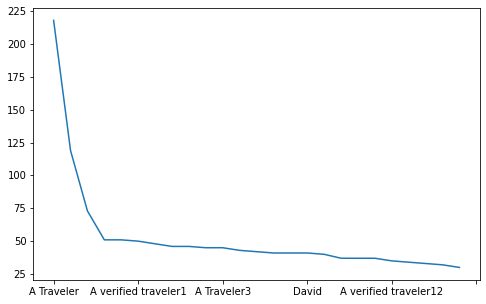

In [32]:
User_Ferq=df['Users'].value_counts()[:25]
sns.barplot(User_Ferq.index,User_Ferq.values)
plt.ylabel('User_Name_Count')
plt.xlabel('User_Name')
plt.xticks(rotation='vertical')
plt.show()

User_Ferq.plot()

**Hotels by City**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Hotels By City')

Text(0.5, 0, 'City Name')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

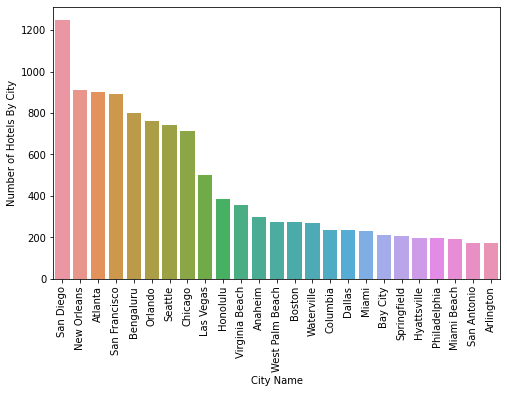

In [33]:
City_Counts = df['City'].value_counts()[:25]
sns.barplot(City_Counts.index,City_Counts.values)
plt.ylabel('Number of Hotels By City')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()

Hotels by Hotel_Category

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Hotel Category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

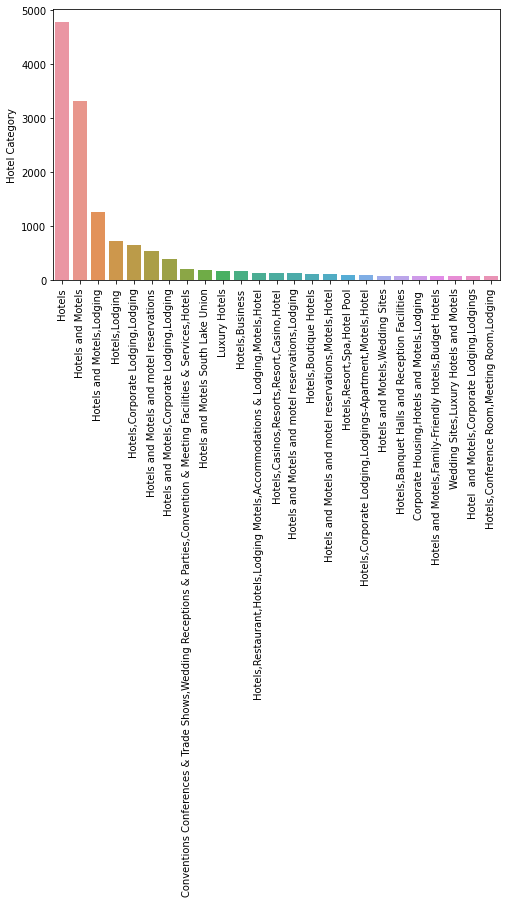

In [34]:
City_Counts = df['Hotel_Category'].value_counts()[:25]
sns.barplot(City_Counts.index,City_Counts.values)
plt.ylabel('Hotel Category')
plt.xticks(rotation='vertical')
plt.show()

**Analyzing the Rating given by the Users**

In [35]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = df.groupby(by='User_id')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

User_id
710      218
17580    119
17618     73
712       51
5834      51
Name: Rating, dtype: int64

In [36]:
no_of_rated_products_per_user.describe()

count    16502.000000
mean         1.319234
std          2.793786
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        218.000000
Name: Rating, dtype: float64

In [37]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of Ratings by User')

Text(0.5, 0, 'Value at the quantile')

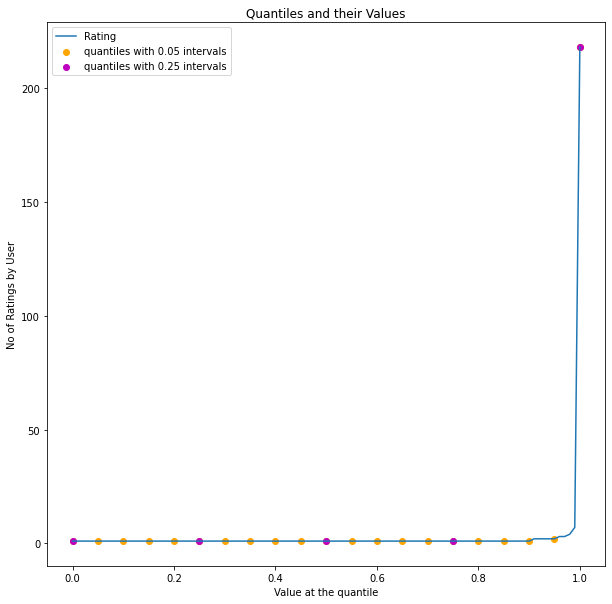

In [38]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of Ratings by User')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [39]:
print('\n No of rated product more than 30 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 30)) )


 No of rated product more than 30 per user : 25



**Reviews Wordclouds**

There are certain words that use more often in titles. I use WordCloud library to find out what are these words.

The word hotel is the most commonly used word in hotel reviews. room, front, desk and good are also among the most commonly occuring words.

<Figure size 1152x576 with 0 Axes>

(-0.5, 3999.5, 1999.5, -0.5)

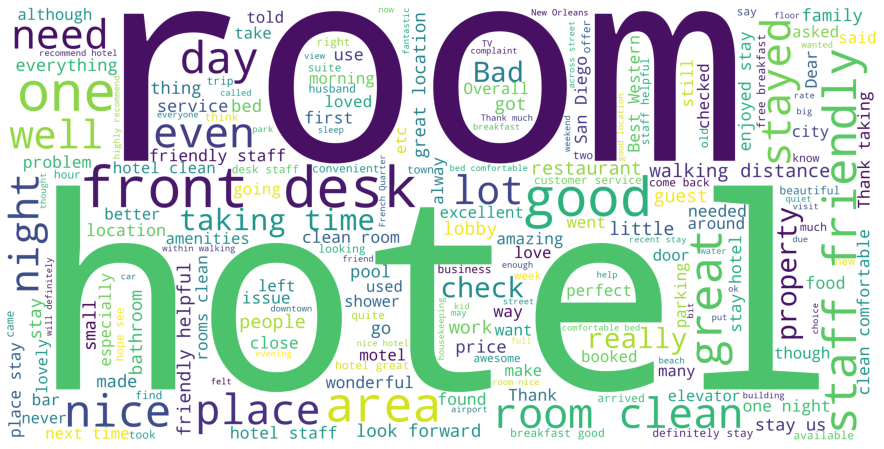

In [40]:
df['Reviews'] = df['Reviews'].astype('str')

title_corpus = ' '.join(df['Reviews'])


title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.savefig('world1.png',dpi=300,bbox_inches='tight')
plt.show()

# **Recommender System**

**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly

In [41]:
#Getting the new dataframe which contains users who has given 20 or more ratings

new_df=df.groupby("Hotel_id").filter(lambda x:x['Rating'].count() >=20)

Text(0.5, 1.0, '# RATINGS per Hotel')

Text(0.5, 0, 'Hotels')

Text(0, 0.5, 'No of Ratings per Hotel')

[]

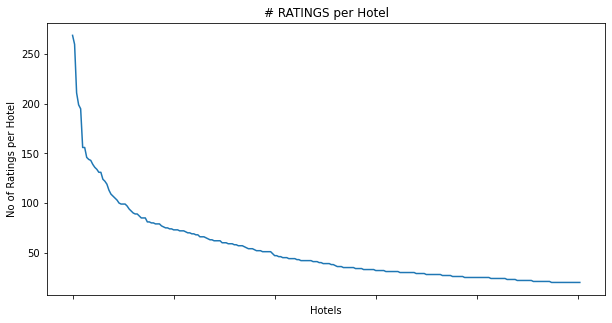

In [42]:
no_of_ratings_per_hotel = new_df.groupby(by='Hotel_id')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_hotel.values)
plt.title('# RATINGS per Hotel')
plt.xlabel('Hotels')
plt.ylabel('No of Ratings per Hotel')
ax.set_xticklabels([])

plt.show()

In [43]:
#Average rating of the Hotel 

new_df.groupby('Hotel_id')['Rating'].mean().head()

Hotel_id
2    3.013889
3    2.033333
4    3.562500
5    4.011765
6    2.618557
Name: Rating, dtype: float64

In [44]:
new_df.groupby('Hotel_id')['Rating'].mean().sort_values(ascending=False).head()

Hotel_id
16      4.966667
52      4.913043
2576    4.903226
628     4.900000
90      4.888889
Name: Rating, dtype: float64

In [45]:
#Total no of rating for Hotel

new_df.groupby('Hotel_id')['Rating'].count().sort_values(ascending=False).head()

Hotel_id
3113    269
9       260
38      211
2189    199
656     195
Name: Rating, dtype: int64

In [46]:
ratings_mean_count = pd.DataFrame(new_df.groupby('Hotel_id')['Rating'].mean())

In [47]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('Hotel_id')['Rating'].count())

In [48]:
ratings_mean_count.head()

,Rating,rating_counts
Hotel_id,,
2,3.013889,72
3,2.033333,30
4,3.562500,32
5,4.011765,85
6,2.618557,97


In [49]:
ratings_mean_count['rating_counts'].max()

269

<Figure size 576x432 with 0 Axes>

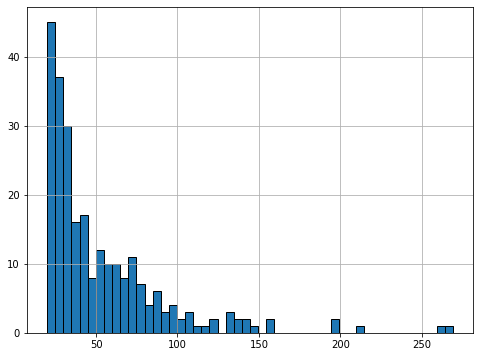

In [50]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

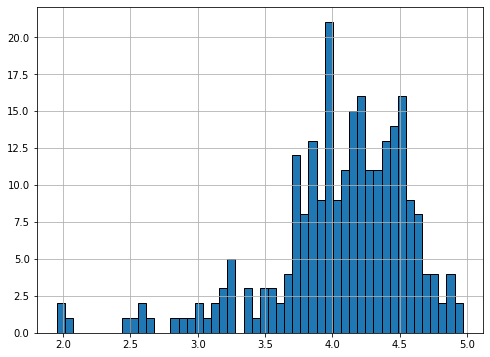

In [51]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

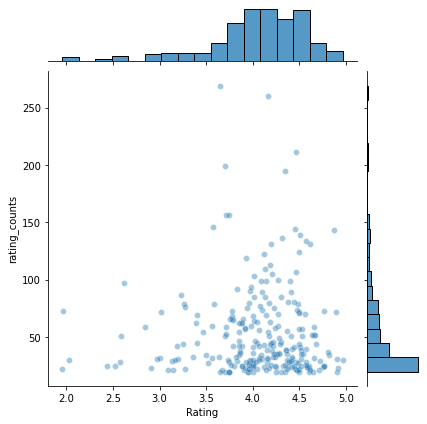

In [52]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

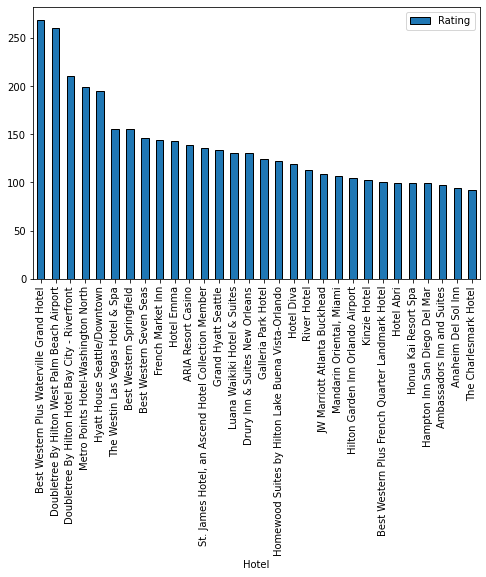

In [53]:
popular_products = pd.DataFrame(new_df.groupby('Hotel')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

**2.Simple Recommender**

The Simple Recommender offers generalized recommnendations to every user based on hotel popularity, ratings, and City. The basic idea behind this recommender is that hotels that are more popular and more critically acclaimed will have a higher probability of being liked by the average Customers. This model does not give personalized recommendations based on the user.

So I sort the hotel based on their location, and I recommend the ones with the highest number of votes and the higher average rankings to the new Customers.

In [54]:
df=df[['User_id','Hotel_id','Rating','City','Hotel','Hotel_Type','Price']]
df.head()

,User_id,Hotel_id,Rating,City,Hotel,Hotel_Type,Price
0,15400,0,1.0,Beaumont,La Quinta,2.0,Rs.8989
1,17618,2,2.0,Seattle,Inn At Queen Anne,2.0,Rs.8457
2,17602,2,4.0,Seattle,Inn At Queen Anne,2.0,Rs.8457
3,17601,2,4.0,Seattle,Inn At Queen Anne,2.0,Rs.8457
4,17600,2,1.0,Seattle,Inn At Queen Anne,2.0,Rs.8457


**The list of the 10 best Hotels to recommend in 'San Francisco' are:**

In [55]:
a=df[df.City=='San Francisco'].Hotel_id.value_counts().head(30).index
count=0
for i in a:
    if (df[(df.Hotel_id==i)].Rating.mean()>4.1)&(count<10):
        count+=1
        print(count,':',df[(df.City=='San Francisco')&(df.Hotel_id==i)].Hotel.iloc[0])

1 : Galleria Park Hotel
2 : Hotel Abri
3 : The Orchard Garden Hotel
4 : The St. Regis San Francisco
5 : Columbus Motor Inn
6 : InterContinental San Francisco
7 : Hotel Nikko San Francisco
8 : Kensington Park Hotel
9 : San Francisco Marriott Marquis
10 : Inn San Francisco


**The list of the 10 best Hotels to recommend in 'San Diego' are:**

In [56]:
a=df[df.City=='San Diego'].Hotel_id.value_counts().head(30).index
count=0
for i in a:
    if (df[(df.Hotel_id==i)].Rating.mean()>3)&(count<10):
        count+=1
        print(count,':',df[(df.City=='San Diego')&(df.Hotel_id==i)].Hotel.iloc[0])

1 : Best Western Seven Seas
2 : Hampton Inn San Diego Del Mar
3 : Ocean Park Inn
4 : The Pearl Hotel
5 : Best Western Mission Bay
6 : Best Western Yacht Harbor Hotel
7 : Best Western San Diego/Miramar Hotel
8 : Best Western Plus Hacienda Hotel Old Town
9 : Best Western Plus Bayside Inn
10 : Quality Suites San Diego SeaWorld Area


**The list of the 10 best Hotels to recommend in 'Bengaluru' are:**

In [57]:
a=df[df.City=='Bengaluru'].Hotel_id.value_counts().head(30).index
count=0
for i in a:
    if (df[(df.Hotel_id==i)].Rating.mean()>4)&(count<10):
        count+=1
        print(count,':',df[(df.City=='Bengaluru')&(df.Hotel_id==i)].Hotel.iloc[0])

1 : Shreyas Yoga Retreat
2 : Treebo Trend Rajathadri Palace
3 : Zone by the Park Electronic City
4 : Fortune Park JP Celestial
5 : Wonderla Resort
6 : Gokulam Grand Hotel & Spa
7 : Signature Club Resort
8 : Royal Orchid Resort & Convention Centre
9 : Sheraton Grand Bengaluru Whitefield Hotel & Convention Center
10 : Welcomhotel Bengaluru


**3. Item-Item Collaborative Filtering**

In this filtering, the similarity between each item pair was computed and based on that, similar items were recommended which are liked by the users in the past. The weighted sum of ratings of “item-users” were taken.

This collaborative filtering is useful when the number of users is more than the items being recommended.

In [58]:
ratingsd=df.pivot(index='Hotel_id',columns= 'User_id',values='Rating').fillna(0)
ratingsd.head(10)

User_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17722,17723,17724,17725,17726,17727,17728,17729,17730,17731,17732,17733,17734,17735,17736,17737,17739,17740,17741,17742,17743,17746,17747,17748,17749,17750,17751,17752,17753,17754,17755,17756,17757,17758,17759,17760,17761,17762,17763,17764
Hotel_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
ratingsd.shape


(2422, 16502)

**Train-Test Split**

In [60]:
from sklearn.model_selection import train_test_split
traind, testd = train_test_split(ratingsd, test_size=0.25,random_state=42)

In [61]:
train = traind.to_numpy()
test = testd.to_numpy()

In [62]:
sparsity = float(len(train.nonzero()[0]))
sparsity /= (train.shape[0] * train.shape[1])
sparsity *= 100
print ('Sparsity: {:5.2f}%'.format(sparsity))

Sparsity:  0.06%


In [63]:
def item_similarity(Rating, epsilon=1e-9):
    # epsilon -> for handling dived-by-zero errors
    sim = Rating.T.dot(Rating) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [64]:
item_sim = item_similarity(train)


In [65]:
def predict_item(ratings, similarity):
    return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [66]:
item_prediction = predict_item(train, item_sim)


In [67]:
item_prediction[:4, :4]


array([[1.19740841e-10, 1.35876694e-10, 1.23592452e-10, 3.72480709e-10],
       [3.99136136e-11, 4.52922314e-11, 4.11974839e-11, 1.24160236e-10],
       [9.54108751e-11, 1.08268108e-10, 9.84798830e-11, 2.96796901e-10],
       [1.99568068e-11, 2.26461157e-11, 2.05987420e-11, 6.20801182e-11]])

In [68]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [69]:
print ('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))


Item-based CF MSE: 17.679626992476646


In [70]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(traind) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pm=pd.DataFrame(cosine_similarity(r_mat_tr))
#pm.head()
ctrain = cosine_similarity(r_mat_tr)

[0.04001267 0.02301479 0.01478377 0.01296878 0.01292513 0.01162553
 0.01132567 0.00983173 0.0097719  0.00975773 0.0094814  0.00875611
 0.00861568 0.00798877 0.00757234 0.00750949 0.00736437 0.0070166
 0.00673454 0.00668233 0.00655518 0.00651531 0.00640658 0.00604587
 0.00591565 0.00583855 0.00573551 0.00538493 0.00529484 0.00521686
 0.00521165 0.00503521 0.00500466 0.00486506 0.0047118  0.00463342
 0.00463804 0.00446858 0.00438407 0.00430626 0.00426191 0.00424095
 0.00402303 0.00392086 0.00387885 0.00379374 0.00375994 0.0036957
 0.00365299 0.00360692]
0.3787422462558305


In [71]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(testd) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pmtt=pd.DataFrame(cosine_similarity(r_mat_tr))
#print (pmtt[:2])
#pmtt.head()
ctest = cosine_similarity(r_mat_tr)

[0.03421507 0.0273933  0.02402671 0.02384295 0.02172463 0.02025278
 0.01910559 0.01861906 0.01849565 0.01812899 0.01772351 0.01729357
 0.01389622 0.01426866 0.01355253 0.01328294 0.01236885 0.01233443
 0.01189197 0.01138558 0.01009622 0.00951348 0.0092451  0.00823943
 0.007995   0.00783456 0.00749697 0.00736444 0.00717395 0.00710163
 0.00676707 0.00673741 0.00670952 0.00582039 0.00572383 0.00566002
 0.00564962 0.00560585 0.00560404 0.00551853 0.00530638 0.00511517
 0.0050731  0.00505808 0.00501632 0.0048906  0.00482353 0.00480539
 0.00476832 0.00473363]
0.5552505250254852


In [72]:
print (' CF MSE: ' + str(get_mse(ctrain, ctest)))


 CF MSE: 0.1786651950141145


In [73]:
df = df.sort_values(by='Rating')
df = df.reset_index(drop=True)
count_users = df.groupby("User_id", as_index=False).count()

In [74]:
count = df.groupby("Hotel_id", as_index=False).mean()


In [75]:
items_df = count[['Hotel_id']]
items_df.head()
print(len(items_df))

,Hotel_id
0,0
1,2
2,3
3,4
4,5


2422


In [76]:
users_df = count_users[['User_id']]
users_df.head()
print(len(users_df))

,User_id
0,0
1,1
2,2
3,3
4,4


16502


In [77]:
users_list = users_df.values
len(users_list)

16502

In [78]:
df_clean_matrix = df.pivot(index='Hotel_id', columns='User_id', values='Rating').fillna(0)
df_clean_matrix = df_clean_matrix.T
R = (df_clean_matrix).to_numpy()
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.00206441, -0.00206441, -0.00206441, ..., -0.00206441,
        -0.00206441, -0.00206441],
       [-0.00206441, -0.00206441, -0.00206441, ..., -0.00206441,
        -0.00206441, -0.00206441],
       [-0.00206441, -0.00206441, -0.00206441, ..., -0.00206441,
        -0.00206441, -0.00206441],
       ...,
       [-0.00206441, -0.00206441, -0.00206441, ..., -0.00206441,
        -0.00206441, -0.00206441],
       [-0.00123865, -0.00123865, -0.00123865, ..., -0.00123865,
        -0.00123865, -0.00123865],
       [-0.00082576, -0.00082576, -0.00082576, ..., -0.00082576,
        -0.00082576, -0.00082576]])

In [80]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned)

In [81]:
sigma = np.diag(sigma)


In [82]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_clean_matrix.columns)
preds_df['User_id'] = users_df
preds_df.set_index('User_id', inplace=True)
preds_df.head()

Hotel_id,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,28,29,30,32,33,34,36,37,38,40,42,43,44,45,46,...,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3106,3107,3108,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3126,3127,3128
User_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.002217,-0.001153,0.000802,0.002230,-0.002624,-0.001534,-0.002204,0.002217,-0.000970,0.000513,-0.000074,-0.001638,-0.002244,0.002249,0.002252,0.002239,0.002229,-0.001026,0.002223,-0.000317,0.002225,0.002221,0.002265,-0.000917,0.002238,0.002222,-0.000671,-0.002783,-0.003501,0.002220,0.002219,0.002225,0.001192,0.002169,-0.001516,-0.002565,0.002227,0.002216,0.002217,-0.001921,...,0.002222,0.002223,0.002224,0.002222,0.002206,0.002223,0.002159,0.002240,0.002223,0.002226,0.002230,0.002222,0.002222,0.002226,0.002223,0.002231,0.002222,0.002224,0.002225,0.002249,0.002225,-0.003294,0.002230,0.002297,-0.000616,-0.001164,0.002228,-0.001421,0.002232,0.002223,-0.002591,-0.002288,0.000381,0.002229,0.001344,0.002221,-0.003295,0.002225,-0.002621,0.002210
1,0.002219,-0.001196,0.000784,0.002232,-0.002690,-0.001587,-0.002272,0.002219,-0.000958,0.000490,-0.000104,-0.001686,-0.002305,0.002253,0.002255,0.002241,0.002231,-0.001071,0.002225,-0.000355,0.002228,0.002224,0.002269,-0.000952,0.002240,0.002224,-0.000709,-0.002855,-0.003583,0.002222,0.002221,0.002227,0.001178,0.002300,-0.001562,-0.002631,0.002229,0.002218,0.002219,-0.001977,...,0.002225,0.002225,0.002226,0.002224,0.002208,0.002225,0.002160,0.002243,0.002225,0.002228,0.002233,0.002224,0.002224,0.002228,0.002225,0.002233,0.002224,0.002227,0.002227,0.002252,0.002227,-0.003374,0.002233,0.002301,-0.000657,-0.001116,0.002230,-0.001469,0.002235,0.002225,-0.002657,-0.002349,0.000355,0.002231,0.001333,0.002223,-0.003373,0.002227,-0.002685,0.002212
2,0.002217,-0.001146,0.000805,0.002229,-0.002612,-0.001524,-0.002192,0.002217,-0.000973,0.000516,-0.000069,-0.001630,-0.002233,0.002248,0.002252,0.002238,0.002228,-0.001018,0.002223,-0.000311,0.002225,0.002221,0.002264,-0.000911,0.002237,0.002221,-0.000664,-0.002770,-0.003487,0.002220,0.002218,0.002225,0.001194,0.002149,-0.001508,-0.002554,0.002227,0.002215,0.002217,-0.001911,...,0.002222,0.002222,0.002224,0.002222,0.002205,0.002223,0.002159,0.002240,0.002222,0.002225,0.002230,0.002222,0.002222,0.002225,0.002222,0.002230,0.002222,0.002224,0.002224,0.002248,0.002224,-0.003280,0.002230,0.002297,-0.000609,-0.001171,0.002228,-0.001412,0.002232,0.002222,-0.002580,-0.002277,0.000385,0.002228,0.001346,0.002220,-0.003281,0.002224,-0.002610,0.002210
3,0.001770,-0.000855,0.000668,0.001780,-0.001996,-0.001144,-0.001658,0.001770,-0.000790,0.000445,-0.000013,-0.001235,-0.001699,0.001794,0.001797,0.001787,0.001779,-0.000750,0.001775,-0.000196,0.001777,0.001774,0.001806,-0.000678,0.001786,0.001774,-0.000477,-0.002113,-0.002674,0.001773,0.001772,0.001777,0.000975,0.001559,-0.001140,-0.001950,0.001778,0.001769,0.001771,-0.001450,...,0.001775,0.001775,0.001776,0.001774,0.001762,0.001775,0.001726,0.001788,0.001775,0.001777,0.001780,0.001774,0.001774,0.001777,0.001775,0.001781,0.001774,0.001776,0.001776,0.001795,0.001776,-0.002511,0.001781,0.001832,-0.000429,-0.001000,0.001779,-0.001061,0.001782,0.001775,-0.001971,-0.001736,0.000345,0.001779,0.001092,0.001773,-0.002515,0.001776,-0.001996,0.001765
4,0.001987,0.002797,-0.008000,0.002250,-0.008595,-0.027455,-0.058523,0.001988,-0.072184,-0.004583,-0.079153,0.000614,-0.041215,0.002211,0.003377,0.002854,0.002449,-0.049106,0.002210,-0.025188,0.002281,0.002150,0.002453,0.032016,0.002807,0.002158,-0.007117,-0.052008,-0.091147,0.002100,0.002040,0.002333,-0.012226,0.014693,0.001804,-0.032520,0.002405,0.001846,0.002975,-0.022036,...,0.002184,0.002230,0.002252,0.002221,0.001764,0.002207,-0.000664,0.002467,0.002190,0.002346,0.011876,0.002176,0.002176,0.002360,0.002198,0.005278,0.002176,0.002257,0.002319,0.010071,0.002284,-0.072176,0

In [83]:
preds_df.shape


(16502, 2422)

In [84]:
def recommend_it(predictions_df, itm_df, original_ratings_df, num_recommendations=10,rUsersid= 20):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[rUsersid].sort_values(ascending=False)
    
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.User_id == rUsersid]
    user_full = (user_data.merge(itm_df, how = 'left', left_on = 'Hotel_id', right_on = 'Hotel_id').
                     sort_values(['Rating'], ascending=False)
                 )

    print ('User {0} has already stayed in {1} hotel.'.format(rUsersid, user_full.shape[0]))
    print ('Recommending the highest {0} predicted  hotels never opted for the stay.'.format(num_recommendations))
    
    # Recommend the highest predicted rating items that the user hasn't bought yet.
    recommendations = (itm_df[~itm_df['Hotel_id'].isin(user_full['Hotel_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Hotel_id',
               right_on = 'Hotel_id').
         rename(columns = {rUsersid: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    topk=recommendations.merge(original_ratings_df,left_index = True, right_on = 'Hotel_id',left_on='Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel']]

    return topk

In [85]:
recommend_it(preds_df, items_df, df, 10)


User 20 has already stayed in 1 hotel.
Recommending the highest 10 predicted  hotels never opted for the stay.


,Hotel_id,Hotel
353,2126,Hotel Emma
954,5,Country Inn and Suites By Carlson Corbin
813,3113,Best Western Plus Waterville Grand Hotel
809,2929,Hampton Inn San Diego Del Mar
1025,3115,Comfort Inn and Suites O'fallon
804,951,Hyatt Place Chicago Downtown/The Loop
1775,2822,French Market Inn
81,30,Gran Melia Victoria
5355,3112,Hotel Russo Palace
1187,3120,Days Inn El Reno Ok


In [86]:
def recommend_it(predictions_df, itm_df, original_ratings_df, num_recommendations=10,rUsersid= 995):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[rUsersid].sort_values(ascending=False)
    
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.User_id == rUsersid]
    user_full = (user_data.merge(itm_df, how = 'left', left_on = 'Hotel_id', right_on = 'Hotel_id').
                     sort_values(['Rating'], ascending=False)
                 )

    print ('User {0} has already stayed in {1} hotel.'.format(rUsersid, user_full.shape[0]))
    print ('Recommending the highest {0} predicted  hotels never opted for the stay.'.format(num_recommendations))
    
    # Recommend the highest predicted rating items that the user hasn't bought yet.
    recommendations = (itm_df[~itm_df['Hotel_id'].isin(user_full['Hotel_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Hotel_id',
               right_on = 'Hotel_id').
         rename(columns = {rUsersid: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    topk=recommendations.merge(original_ratings_df,left_index = True, right_on = 'Hotel_id',left_on='Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel']]

    return topk

In [87]:
recommend_it(preds_df, items_df, df, 10)


User 995 has already stayed in 3 hotel.
Recommending the highest 10 predicted  hotels never opted for the stay.


,Hotel_id,Hotel
390,2189,Metro Points Hotel-Washington North
1062,2741,Best Western Springfield
2335,2931,Embassy Suites by Hilton Crystal City National...
841,2812,Ramada BWI Airport/Arundel Mills
1116,3124,The Houstonian Hotel
954,5,Country Inn and Suites By Carlson Corbin
632,42,Super 8 Ithaca
962,3107,Hawthorn Suites By Wyndham Livermore Wine Country
1443,3127,Holiday Inn Canyon De Chelly
31,32,Country Inn Walker
